In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('medical_examination.csv')

In [29]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,inf
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,inf
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,inf
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,inf
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,inf
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,inf
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,inf
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,inf


In [3]:
df['overweight'] = df['weight'] / ((df['height'] / 100) ** 2).round().apply(lambda x: 1 if x > 25 else 0)

In [4]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)


In [6]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol' , 'gluc' , 'smoke' , 'alco' , 'active' , 'overweight'])
 

In [7]:
df_cat['total'] = 1
df_cat = df_cat.groupby(['cardio','variable','value'], as_index=False).count()

C:\Users\Decanus\AppData\Roaming\Python\Python313\site-packages\matplotlib\colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
C:\Users\Decanus\AppData\Roaming\Python\Python313\site-packages\matplotlib\colors.py:2294: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


SyntaxError: 'return' outside function (2393613212.py, line 3)

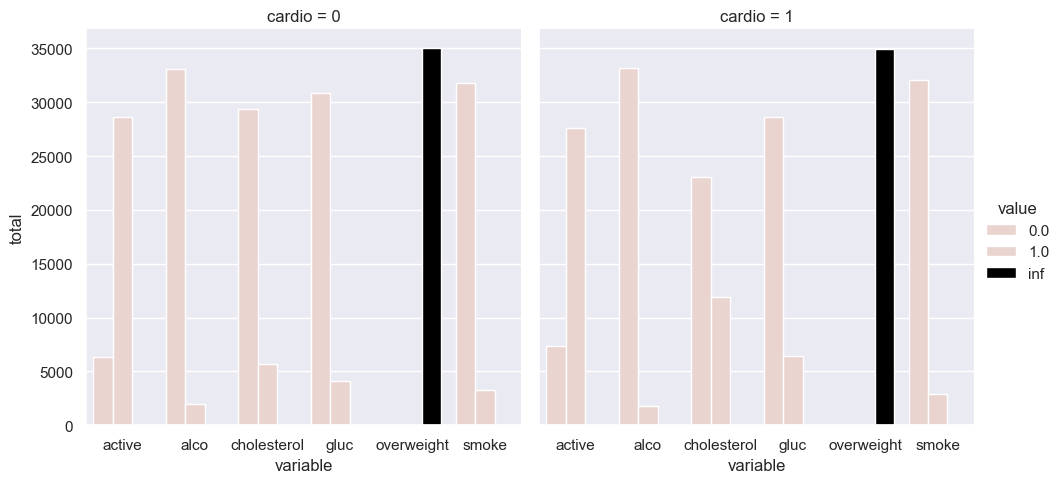

In [13]:
fig = sns.catplot(x='variable', y='total', data=df_cat, hue='value', kind='bar', col='cardio')
fig.savefig('myplot.png')
return fig

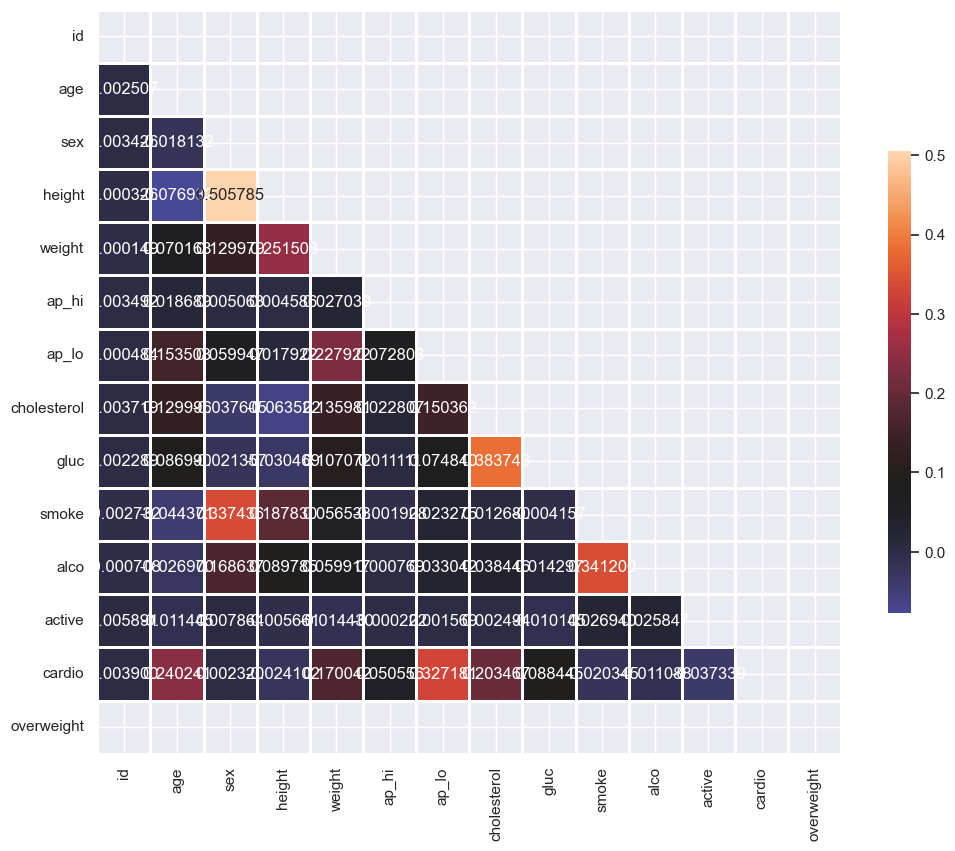

In [22]:
    df_heat = df[
    (df['ap_lo'] <= df['ap_hi'])&
    (df['height'] >= df['height'].quantile(0.025))&
    (df['height'] <= df['height'].quantile(0.975))&
    (df['weight'] >= df['weight'].quantile(0.025))&
    (df['weight'] <= df['weight'].quantile(0.975))]
    # 12
    corr = df_heat.corr(method='pearson')

    # 13
    mask = np.triu(corr)



    # 14
    fig, ax = plt.subplots(figsize=(12,12))

    # 15
 
    sns.heatmap(corr, linewidths=1, annot = True, square = True, mask=mask, fmt='1f', center=0.08, cbar_kws={'shrink':0.5})  

    # 16
    fig.savefig('heatmap.png')